In [1]:
import tensorflow as tf
import cv2 as cv
import os
from keras.layers import Dropout,Conv2D,Flatten,MaxPooling2D,Dense
from keras.models import Sequential,Model
from keras.applications import InceptionV3

Using TensorFlow backend.


In [2]:
params = {
    'TRAIN_DATASET':'data/train_filtered',
    'VAL_DATASET':'data/val_filtered',
    'epochs':5,
    'batch_size':16,
    'target_size':[256,256]
}

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    channel_shift_range=0.3,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1. / 255,
)

val_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
)

In [4]:
train = train_datagen.flow_from_directory(
    directory = params['TRAIN_DATASET'],
    target_size=params['target_size'],
    class_mode='categorical',
    shuffle=True,
    batch_size=params['batch_size']
)

validation = train_datagen.flow_from_directory(
    directory = params['VAL_DATASET'],
    target_size=params['target_size'],
    class_mode='categorical',
    shuffle=True,
    batch_size=params['batch_size']
)

Found 8178 images belonging to 120 classes.
Found 2044 images belonging to 120 classes.


In [5]:
inception_model = InceptionV3(
    input_shape=(256, 256, 3),
    include_top=False,
    weights="imagenet"
)

In [6]:
for layer in inception_model.layers:
    layer.trainable = False 

In [7]:
last_layer = inception_model.output

last_layer = Flatten()(last_layer)
last_layer = Dense(512,activation='relu')(last_layer)
last_layer = Dropout(0.35)(last_layer)
last_layer = Dense(256,activation=tf.nn.relu)(last_layer)
last_layer = Dropout(0.2)(last_layer)
last_layer = Dense(64,activation='relu')(last_layer)
last_layer = Dense(120,activation='softmax')(last_layer)

model = Model(inception_model.input, last_layer)

In [8]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
                             'Model/inception_model/inception_cnn.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

callbacks = [checkpoint]

In [9]:
model.compile(optimizer = 'adam', 
              loss='binary_crossentropy', 
             metrics=['accuracy'])

In [10]:
history = model.fit_generator(
    train,
    epochs=5,
    validation_data=validation,
    callbacks=callbacks
)

Epoch 1/5
512/512 [==============================] - 219s 427ms/step - loss: 0.0579 - accuracy: 0.9910 - val_loss: 0.0482 - val_accuracy: 0.9917
Epoch 2/5
512/512 [==============================] - 197s 385ms/step - loss: 0.0482 - accuracy: 0.9917 - val_loss: 0.0480 - val_accuracy: 0.9917
Epoch 3/5
512/512 [==============================] - 207s 404ms/step - loss: 0.0481 - accuracy: 0.9917 - val_loss: 0.0482 - val_accuracy: 0.9917
Epoch 4/5
512/512 [==============================] - 200s 390ms/step - loss: 0.0481 - accuracy: 0.9917 - val_loss: 0.0481 - val_accuracy: 0.9917
Epoch 5/5
512/512 [==============================] - 243s 474ms/step - loss: 0.0481 - accuracy: 0.9917 - val_loss: 0.0484 - val_accuracy: 0.9917


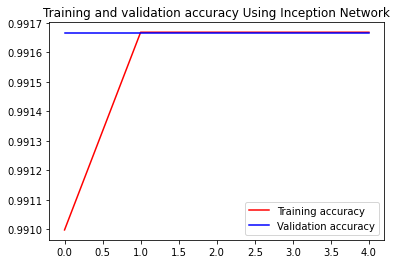

&lt;Figure size 432x288 with 0 Axes&gt;

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy Using Inception Network')
plt.legend()
plt.figure()


plt.show()

&lt;Figure size 432x288 with 0 Axes&gt;

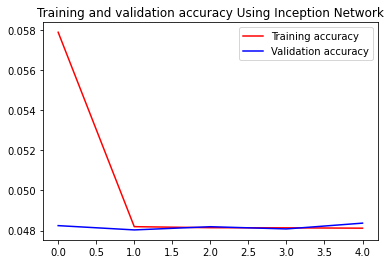

&lt;Figure size 432x288 with 0 Axes&gt;

In [15]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy Using Inception Network')
plt.legend()
plt.figure()